# Clustering

## Wolesale Store : Customer Dataset

In [187]:
import pandas as pd

In [188]:
input_file = ("/Users/pratik/Desktop/Harrisburg University programs/Courses/Late Fall Courses 2022/ANLY 530 Principles of Machine Learning/Assignments & PPT's/Assignment 3/Datasets/Wholesale_customers_data.csv")

In [189]:
data = pd.read_csv(input_file)

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [191]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [192]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [193]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [194]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### To see the statistics of variables (simmilar to describe function) using a for loop

In [195]:
for i in ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']:
          print('Maximum of ',i, ' is',data[i].max(), 'while mean value is ',data[i].mean())

Maximum of  Fresh  is 112151 while mean value is  12000.297727272728
Maximum of  Milk  is 73498 while mean value is  5796.265909090909
Maximum of  Grocery  is 92780 while mean value is  7951.277272727273
Maximum of  Frozen  is 60869 while mean value is  3071.931818181818
Maximum of  Detergents_Paper  is 40827 while mean value is  2881.4931818181817
Maximum of  Delicassen  is 47943 while mean value is  1524.8704545454545


#### Fitting a normal distribution to one of the variables the formula for x creates a distribution for values of x for "Fresh" varaiable, upto 3 SD's form the mean.

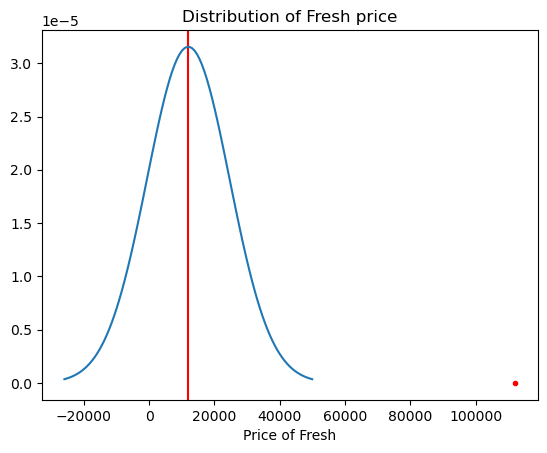

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = data['Fresh'].mean()
sigma = data['Fresh'].std()
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
x_axis = np.arange(0, 10, 0.001)
#plt.plot(data["Fresh"].max(), norm.pdf(x,mu,sigma))
plt.axvline(x=mu, color='r')
plt.plot(x,norm.pdf(x,mu,sigma))
plt.plot([data['Fresh'].max()], [0], marker='o', markersize=3, color="red")
plt.title('Distribution of Fresh price')
plt.xlabel('Price of Fresh')
plt.show()

#### Remove values that are more than 3 times of std. dev

In [198]:
from scipy import stats

#### For each column, first it computes the "Z-score" of each value in the column, relative to the column mean and standard deviation.Then it takes the absolute of Z-score because the direction does not matter, only if it is below the threshold. Then, "all(axis=1)" ensures that for each row, all column satisfy the constraint. Finally, result of this condition is used to index the dataframe.

In [199]:
data_new = data[(np.abs(stats.zscore(data)) < 3).all(axis = 1)]
data_new = data_new.drop(["Channel", "Region"], axis = 1)
data_new.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,10711.758454,4871.920290,6814.043478,2549.898551,2373.393720,1237.939614
std,9819.217756,4555.665546,6456.160715,2916.683284,3208.707909,1217.399162
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3063.250000,1477.750000,2116.000000,676.750000,252.750000,395.000000
50%,8040.000000,3530.000000,4528.000000,1447.000000,772.000000,881.000000
75%,15657.000000,6908.500000,9762.250000,3204.250000,3660.500000,1681.750000
max,49063.000000,25862.000000,34792.000000,16919.000000,17120.000000,7844.000000


#### The number of datapoints dropped

In [201]:
print("Number of dropped instances = ", data.shape[0] - data_new.shape[0])

Number of dropped instances =  26


In [202]:
data.shape

(440, 8)

In [203]:
data_new.shape

(414, 6)

### Designing the model

#### Creating clusters with spscifying no of cluster means n_clusters and fitting it on data_new

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=76964057).fit(data_new)
pd.Series(kmeans.labels_).value_counts()

2    143
0    108
4     79
1     42
3     42
dtype: int64

#### Centroids

In [20]:
kmeans.cluster_centers_

array([[16470.87037037,  3026.49074074,  4264.74074074,  3217.30555556,
          996.55555556,  1319.75925926],
       [ 5502.33333333, 13328.47619048, 21524.30952381,  1691.71428571,
         9145.95238095,  1682.30952381],
       [ 5013.3006993 ,  2270.53146853,  2742.87412587,  2597.83916084,
          643.02797203,   834.55244755],
       [32641.95238095,  4895.5       ,  5538.04761905,  3842.69047619,
          944.95238095,  1639.28571429],
       [ 4263.94936709,  7595.20253165, 10526.2278481 ,  1319.65822785,
         4546.65822785,  1406.64556962]])

#### Creating a dataframe with the cluster centres as obtained above. Each of the 5 menas list calculated(5 lists as we specified K as 5)has 6 values, one for each column. Hence we will create a dataframe of these 5 Kmeans list and 6 respective column names


In [21]:

pd.DataFrame(data=kmeans.cluster_centers_, columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,16470.870370,3026.490741,4264.740741,3217.305556,996.555556,1319.759259
1,5502.333333,13328.476190,21524.309524,1691.714286,9145.952381,1682.309524
2,5013.300699,2270.531469,2742.874126,2597.839161,643.027972,834.552448
3,32641.952381,4895.500000,5538.047619,3842.690476,944.952381,1639.285714
4,4263.949367,7595.202532,10526.227848,1319.658228,4546.658228,1406.645570


#### We started with a K means value of 5, As We see the above dataframe gives us the mixture of variables within each of the 5 clusters.
#### For example cluster indexed 1 looks to be heavy on Grocery and above average on Detergents and paper. Cluster indexed 3 looks to be dominant in Fresh category. The value counts give us the distribution of counts for each of 5 clusters as below : 0- 108, 1-42, 2-143, 3-42, 4-79. The cluster numbers were indexed starting from 0. The total of all 5 clsuters for each variable is 414

#### Now we create a a Lop for K values between 2  and 20. Important step is Adding key,value to dict, with key as k no of clusters and value = Inertia: Sum of distances of samples to their closest cluster center = within cluster distance

In [22]:
sse = {}
last_sse = 73984012841.4855
for k in range(2, 19):
    print(last_sse)
    kmeans = KMeans(n_clusters=k, random_state=76964057).fit(data_new)
    data_new["clusters"] = kmeans.labels_
    print(pd.Series(kmeans.labels_).value_counts())
    sse[k] = kmeans.inertia_  # Adding key,value to dict, with key as k no of clusters and value = Inertia: Sum of sdistances of samples to their closest cluster center= within cluster sum of squares
    change_per = (last_sse - kmeans.inertia_)/last_sse*100
    print ('At k= ',k,'The percentage of change in SSE is ',change_per,'%') 
    last_sse = kmeans.inertia_
    print("The last_sse value to be used for K = ", k+1, " is ", last_sse )
print(sse)


73984012841.4855
1    294
0    120
dtype: int64
At k=  2 The percentage of change in SSE is  38.05976060288236 %
The last_sse value to be used for K =  3  is  45825874669.610374
45825874669.610374
2    223
0     99
1     92
dtype: int64
At k=  3 The percentage of change in SSE is  36.79139679443055 %
The last_sse value to be used for K =  4  is  28965895285.395584
28965895285.395584
2    175
0    109
1     84
3     46
dtype: int64
At k=  4 The percentage of change in SSE is  19.949152060286586 %
The last_sse value to be used for K =  5  is  23187444789.288635
23187444789.288635
2    143
0    108
4     79
1     42
3     42
dtype: int64
At k=  5 The percentage of change in SSE is  15.627091486585702 %
The last_sse value to be used for K =  6  is  19563921578.66495
19563921578.66495
1    143
0     98
5     80
2     40
3     37
4     16
dtype: int64
At k=  6 The percentage of change in SSE is  11.357482276048316 %
The last_sse value to be used for K =  7  is  17341952652.868088
17341952652

In [24]:
data_new

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,12669,9656,7561,214,2674,1338,15
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,11
4,22615,5410,7198,3915,1777,5185,7
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,16
436,39228,1431,764,4510,93,2346,5
437,14531,15488,30243,437,14841,1867,8
438,10290,1981,2232,1038,168,2125,1


#### The sse dictionary is created with no of clusters as the keys and the vlaues of inertia or sum of sqaures within a cluster as the value for each key

#### Plotting the figure with key as no of clusters on x axis and values as within cluster distance on y axis

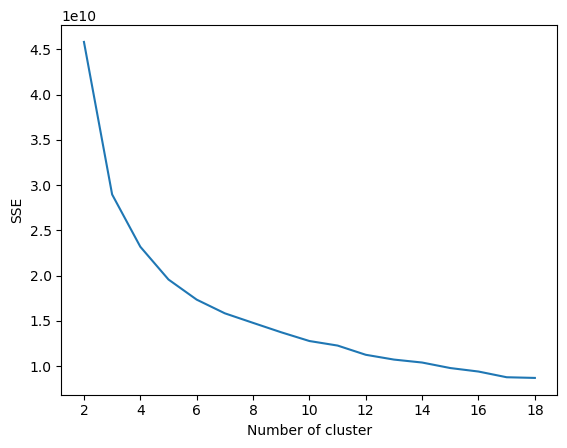

In [25]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster") 
plt.ylabel("SSE")
plt.show()

#### We started with Kmenas value of 5, 5 clusters for each variable. There are different methods to determing the best value of K. Given the range from 1 to 20 clusters as considered for our analysis. By the empirical method the best value would be sqrt(414)/2 = 10. By the elbow method it seems like the best value for k is 6. As we from the graph as the number of clusters are increasing the within cluster distance is decreasing. However from k=7 the percentage change in sse from the previous is under 10. So after K= 6 it is possible that the model may overfit and capture noise. At 6 this change can be see like a elbow effect. Also the between group distance looks good and the percentage change in sse is more from K>k at k=6.

#### Model With k=6

In [50]:
from sklearn.cluster import KMeans
data_new = data_new.drop(["clusters"], axis =1) # Dropping the clusters column which was added before
kmeans = KMeans(n_clusters=6, random_state=76964057).fit(data_new)
pd.Series(kmeans.labels_).value_counts()


1    143
0     98
5     80
2     40
3     37
4     16
dtype: int64

#### Creating data frame with cluster cetners for 6 means (as we have K=6), with each column names (X-coordinate variable  names of centers) containing the wieghtage value of variable (X-coordinate values of respective variables) for each mean (6 means)

In [52]:
pd.DataFrame(data=kmeans.cluster_centers_, columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,15779.591837,2703.561224,3739.795918,3018.826531,834.887755,1174.061224
1,5003.839161,2320.069930,2764.265734,2587.839161,653.475524,843.531469
2,5522.025000,13458.500000,21821.700000,1674.700000,9209.875000,1684.525000
3,26264.756757,6082.432432,7456.864865,4516.702703,1517.810811,2089.729730
4,40149.125000,2728.000000,3303.312500,2999.687500,602.437500,1198.312500
5,4220.700000,7665.225000,10719.987500,1345.637500,4664.075000,1411.875000


#### As we seee for 6 clusters staritng from cluster 0 to cluster 5,  the number of data points in each cluster are explained above in series output.The cluster centre analysis is then updated in the Pandas datafram output. We can see that Cluster 1 has below average values for all categories and may represent smaller customers. Clsuter named 2 is dominant in Grocery and also in Milk category. Cluster named 4 is dominant in the Fresh category.

#### The number of data points in each clusters for all values of k have been included in the output as seen above.For k= 6 clusters we have, 98 data points in cluster 0, 143 data points in cluster 1, 40 data points in cluster 2, 37 data points in cluster 3, 16 data points in cluster 4 and 80 data points in cluster 5.